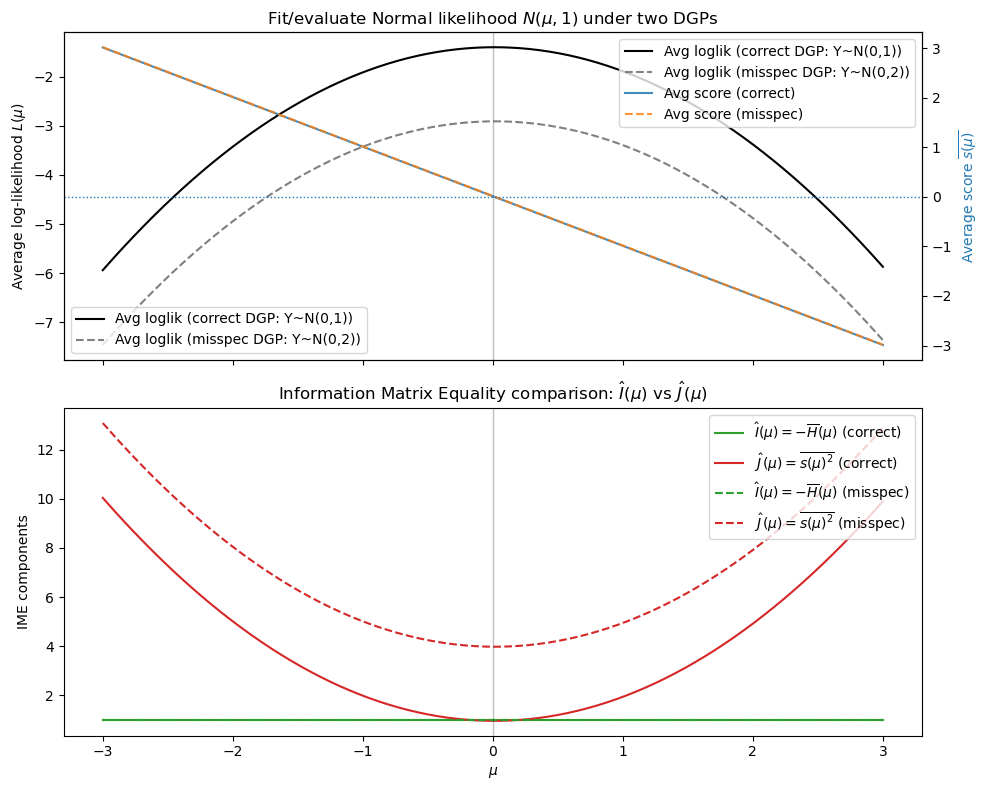

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

n = 4000
mu_true = 0.0

# --- DGPs ---
y_correct = np.random.normal(loc=mu_true, scale=1.0, size=n)  # correct for N(mu,1)
y_misspec = np.random.normal(loc=mu_true, scale=2.0, size=n)  # misspec: true sd=2, model assumes sd=1

# --- Model evaluated: N(mu, 1) ---
const = -0.5 * np.log(2*np.pi)
mu_grid = np.linspace(-3, 3, 400)

def ll_grad_IJ(y):
    """
    For each mu compute:
      L(mu) = avg loglik
      G(mu) = avg score
      I(mu) = -avg Hessian
      J(mu) = avg score^2
    under the N(mu,1) model.
    """
    L = np.empty_like(mu_grid)
    G = np.empty_like(mu_grid)
    I = np.empty_like(mu_grid)
    J = np.empty_like(mu_grid)

    for j, mu in enumerate(mu_grid):
        resid = y - mu
        ll_i = const - 0.5 * resid**2
        score_i = resid                 # s(mu;y) = y - mu
        hess_i = -np.ones_like(y)        # H(mu;y) = -1

        L[j] = ll_i.mean()
        G[j] = score_i.mean()
        I[j] = (-hess_i).mean()          # -H
        J[j] = (score_i**2).mean()       # s^2

    return L, G, I, J

L_c, G_c, I_c, J_c = ll_grad_IJ(y_correct)
L_m, G_m, I_m, J_m = ll_grad_IJ(y_misspec)

# --- Plot: overlay objectives (top) + IME components (bottom) ---
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Top: overlay loglik + overlay average score on twin axis
ax = axes[0]
ax.plot(mu_grid, L_c, color="black", label="Avg loglik (correct DGP: Y~N(0,1))")
ax.plot(mu_grid, L_m, color="gray", linestyle="--", label="Avg loglik (misspec DGP: Y~N(0,2))")
ax.axvline(mu_true, color="k", linewidth=1, alpha=0.25)
ax.set_ylabel(r"Average log-likelihood $L(\mu)$")
ax.set_title(r"Fit/evaluate Normal likelihood $N(\mu,1)$ under two DGPs")
ax.legend(loc="lower left")

ax2 = ax.twinx()
ax2.plot(mu_grid, G_c, color="tab:blue", alpha=0.85, label="Avg score (correct)")
ax2.plot(mu_grid, G_m, color="tab:orange", alpha=0.85, linestyle="--", label="Avg score (misspec)")
ax2.axhline(0, color="tab:blue", linestyle=":", linewidth=1)
ax2.set_ylabel(r"Average score $\overline{s(\mu)}$", color="tab:blue")

lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc="upper right")

# Bottom: ONLY the "gap" plots, overlaid (I and J) for both DGPs
ax = axes[1]
ax.plot(mu_grid, I_c, color="tab:green", label=r"$\hat I(\mu)=-\overline{H}(\mu)$ (correct)")
ax.plot(mu_grid, J_c, color="tab:red", label=r"$\hat J(\mu)=\overline{s(\mu)^2}$ (correct)")

ax.plot(mu_grid, I_m, color="tab:green", linestyle="--", label=r"$\hat I(\mu)=-\overline{H}(\mu)$ (misspec)")
ax.plot(mu_grid, J_m, color="tab:red", linestyle="--", label=r"$\hat J(\mu)=\overline{s(\mu)^2}$ (misspec)")

ax.axvline(mu_true, color="k", linewidth=1, alpha=0.25)
ax.set_xlabel(r"$\mu$")
ax.set_ylabel("IME components")
ax.set_title(r"Information Matrix Equality comparison: $\hat I(\mu)$ vs $\hat J(\mu)$")
ax.legend(loc="upper right")

plt.tight_layout()
plt.show()